In [1]:
install.packages("pROC")
library(pROC)


The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//Rtmph1nBD8/downloaded_packages


Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var




In [2]:
install.packages("vctrs")
install.packages("caret")


The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//Rtmph1nBD8/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//Rtmph1nBD8/downloaded_packages


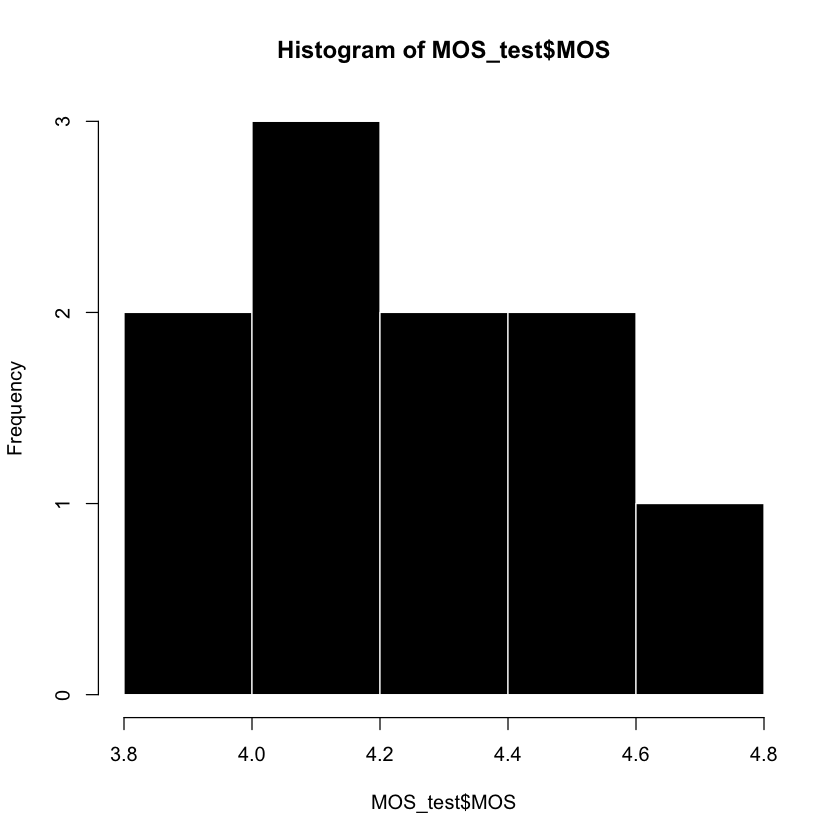

In [3]:
rm(list=ls()) #clears the workspace
#import training dataset
MOS_test = read.csv("/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/Regression/trial_mos_data.csv") 

#plot the target variable
par(bg = "white")  # set background color to white
hist(MOS_test$MOS,
     col = "black",
     border = "white")
#not exactly normally distributed but if the variable is discrete and the number of values is larger than 
# 5 or 6 we can still often use least-squares with decent success

In [4]:
fit <- lm(MOS ~ ., MOS_test)
#fits a linear regression to the data and stores it in the var fit
#where quality is the dependent var
#and all other vars are used to predict quality
summary(fit)


Call:
lm(formula = MOS ~ ., data = MOS_test)

Residuals:
         1          2          3          4          5          6          7 
-0.0205730  0.0317708 -0.0158854 -0.0023192  0.0159346 -0.0233886  0.0006284 
         8          9         10 
 0.0541956 -0.0006284 -0.0397348 

Coefficients: (1 not defined because of singularities)
             Estimate Std. Error t value Pr(>|t|)
(Intercept) 11.904363   7.159820   1.663    0.172
e_up         0.007716   0.052157   0.148    0.890
e_down       0.005880   0.009676   0.608    0.576
e_rtt       -0.024883   0.018263  -1.362    0.245
a_up        -0.013179   0.035774  -0.368    0.731
a_down      -0.006531   0.005549  -1.177    0.304
a_rtt              NA         NA      NA       NA

Residual standard error: 0.04186 on 4 degrees of freedom
Multiple R-squared:  0.9899,	Adjusted R-squared:  0.9773 
F-statistic: 78.65 on 5 and 4 DF,  p-value: 0.0004391


Warning message in predict.lm(fit, MOS_test):
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases"
Warning message in predict.lm(fit, MOS_test):
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases"


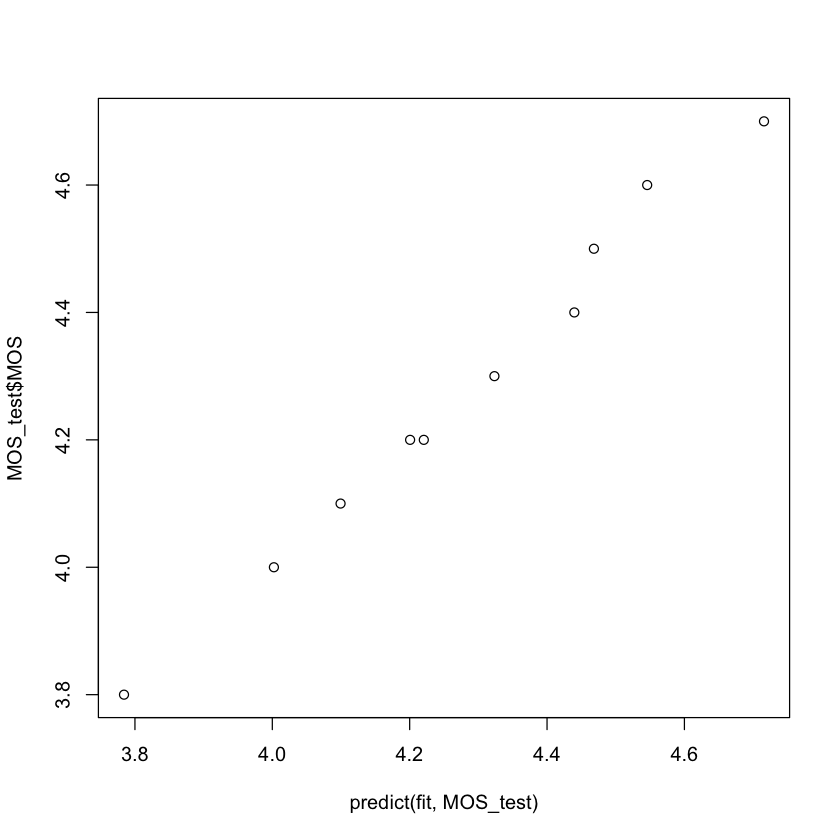

In [5]:
par(bg = "white")  # set background color to white
predictions <- predict(fit, MOS_test)
plot(predict(fit, MOS_test), MOS_test$MOS)
#plots the predicted values against the real values for each datapoint
#a perfect regression would have a y=x diagonal line
#this one is kind of ok (generally diagonal trend)


Call:
glm(formula = MOS_binary ~ ., family = binomial, data = MOS_test)

Coefficients: (1 not defined because of singularities)
              Estimate Std. Error z value Pr(>|z|)
(Intercept)  5.036e+03  2.914e+07       0        1
MOS         -4.913e+02  1.565e+06       0        1
e_up        -8.522e-07  1.637e+05       0        1
e_down       1.302e-07  3.165e+04       0        1
e_rtt       -9.826e+00  6.917e+04       0        1
a_up         5.558e-07  1.139e+05       0        1
a_down      -1.884e-08  2.015e+04       0        1
a_rtt               NA         NA      NA       NA

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1.2217e+01  on 9  degrees of freedom
Residual deviance: 4.2867e-10  on 3  degrees of freedom
AIC: 14

Number of Fisher Scoring iterations: 23


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases"


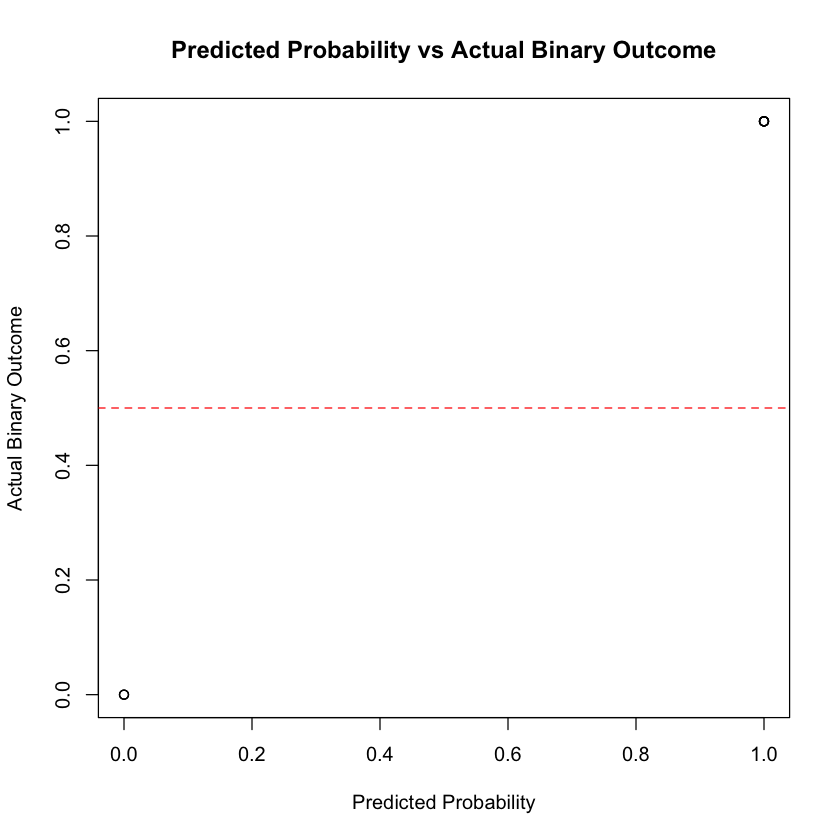

In [6]:
MOS_test$MOS_binary <- ifelse(MOS_test$MOS >= 4.5, "High", "Low")
MOS_test$MOS_binary <- as.factor(MOS_test$MOS_binary)  # Convert to factor

# Fit a logistic regression model
fit_logistic <- glm(MOS_binary ~ ., 
                    data = MOS_test, 
                    family = binomial)

# View the summary of the model
summary(fit_logistic)

# Make predictions
predictions <- predict(fit_logistic, MOS_test, type = "response")
par(bg = "white")
# Plot predicted probabilities vs actual binary outcome
plot(predictions, as.numeric(MOS_test$MOS_binary) - 1, 
     xlab = "Predicted Probability", ylab = "Actual Binary Outcome", 
     main = "Predicted Probability vs Actual Binary Outcome")
abline(h = 0.5, col = "red", lty = 2)  # Adds a reference line at 0.5

In [7]:
# Check correlations between predictors
cor(MOS_test[, c("e.up", "e.down", "e.rtt", "a.up", "a.down", "a.rtt")])

ERROR: Error in `[.data.frame`(MOS_test, , c("e.up", "e.down", "e.rtt", "a.up", : undefined columns selected


Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = MOS_binary ~ ., family = binomial, data = test_data)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)
(Intercept) -1.074e+02  1.766e+06       0        1
e_up         8.040e+00  5.143e+04       0        1
e_down      -2.082e+00  1.655e+04       0        1
e_rtt        3.214e-01  2.872e+03       0        1
a_up        -7.751e+00  7.848e+04       0        1
a_down       2.520e-01  1.716e+04       0        1
a_rtt       -1.911e-02  2.696e+03       0        1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1.2477e+02  on 89  degrees of freedom
Residual deviance: 1.6487e-09  on 83  degrees of freedom
AIC: 14

Number of Fisher Scoring iterations: 25


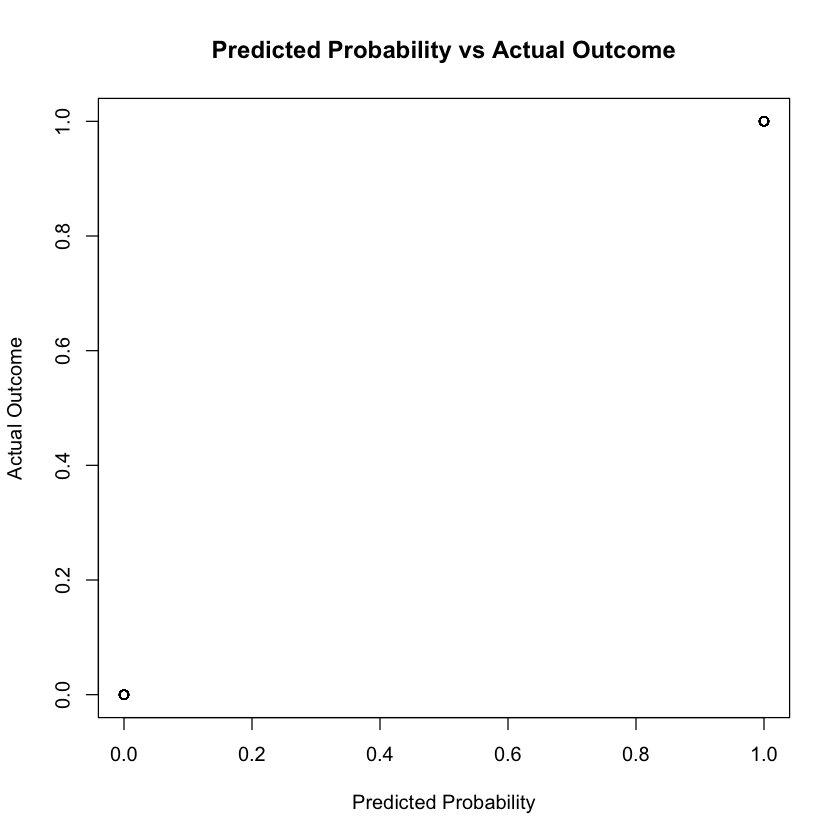

In [9]:
test_data <- read.csv("/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/Regression/trial_mos_data copy.csv")
fit_logistic <- glm(MOS_binary ~ ., 
                           data = test_data, 
                           family = binomial)

# View the summary of the simplified model
summary(fit_logistic)
predictions <- predict(fit_logistic, test_data, type = "response")

# Plot predictions vs actual binary outcome
par(bg = "white")
plot(predictions, test_data$MOS_binary, 
xlab = "Predicted Probability", ylab = "Actual Outcome", main = "Predicted Probability vs Actual Outcome")


Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Setting levels: control = 0, case = 1

Setting direction: controls < cases



Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 45  0
         1  0 45
                                     
               Accuracy : 1          
                 95% CI : (0.9598, 1)
    No Information Rate : 0.5        
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0        
            Specificity : 1.0        
         Pos Pred Value : 1.0        
         Neg Pred Value : 1.0        
             Prevalence : 0.5        
         Detection Rate : 0.5        
   Detection Prevalence : 0.5        
      Balanced Accuracy : 1.0        
                                     
       'Positive' Class : 0          
                                     

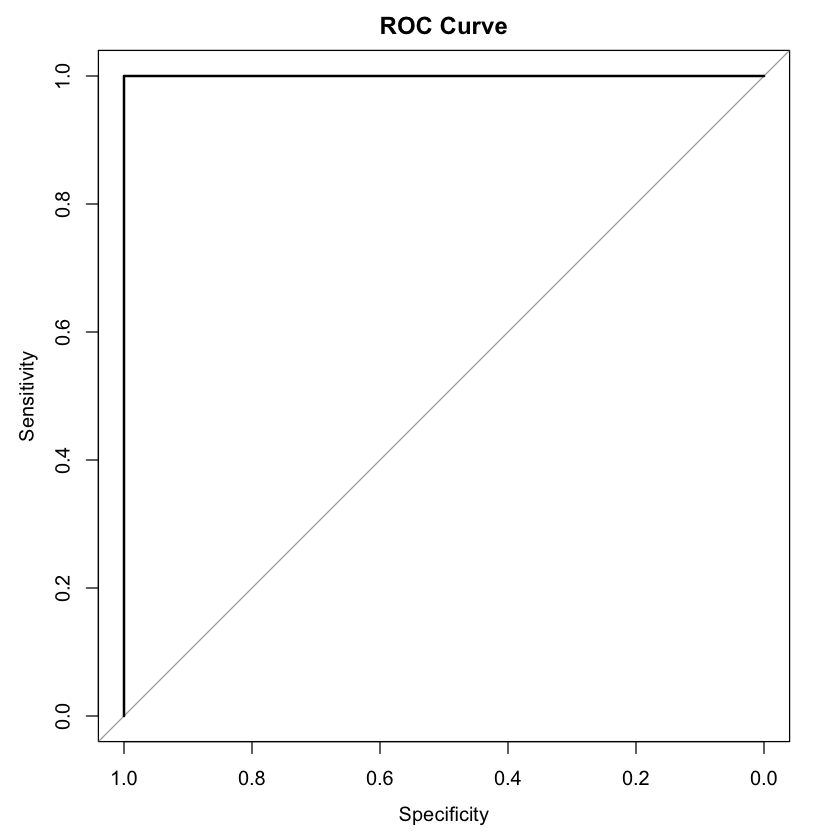

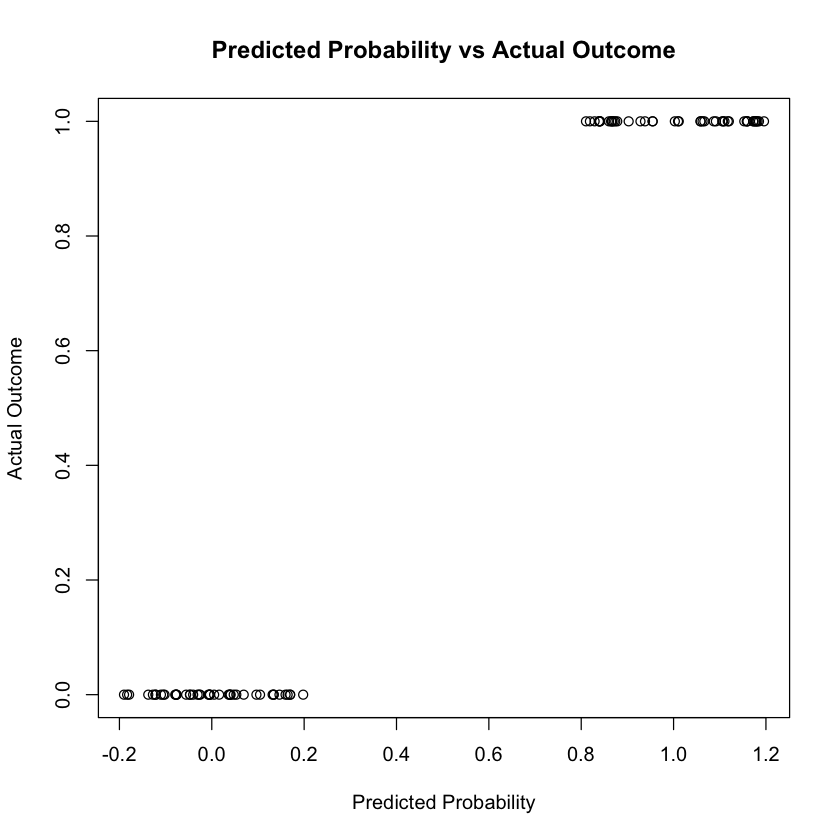

In [12]:
# Load necessary libraries
library(caret)
library(pROC)

# Fit the logistic regression model
fit_logistic <- glm(MOS_binary ~ ., data = test_data, family = binomial)

# Get predictions
predictions <- predict(fit_logistic, test_data, type = "response")

# Plot the ROC curve
par(bg = "white")
roc_curve <- roc(test_data$MOS_binary, predictions)
plot(roc_curve, main = "ROC Curve")

# Print confusion matrix
predicted_class <- ifelse(predictions > 0.5, 1, 0)
confusionMatrix(as.factor(predicted_class), as.factor(test_data$MOS_binary))

# Plot with jitter to visualize overlapping points
par(bg = "white")
plot(jitter(predictions), test_data$MOS_binary, 
     xlab = "Predicted Probability", ylab = "Actual Outcome", 
     main = "Predicted Probability vs Actual Outcome")
